In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
train_data = pd.read_csv("hw1_18_train.dat",
                         names = ["x{0}".format(i) for i in range(1,5)]+["y"],
                         delim_whitespace=True)
train_data.insert(0,"x0",1)
x = np.array(train_data.iloc[:,:-1])
y = np.array(train_data["y"])

In [3]:
def sign(n):
    if n>0:
        return 1
    else:
        return -1

In [4]:
def pocket(w0, update_number, seed = 0, learning_rate = 1.0):
    iter_number = 0
    random.seed(seed)
    w=w0
    n = len(y)
    learning_rate_vector = np.zeros_like(w0)+learning_rate
    learning_rate_vector[0] = 1.0
    while iter_number < update_number:
        while True:
            i = random.randint(0,n-1)
            product = sum(x[i]*w)
            if not sign(product) == sign(y[i]):
                w = w + x[i]*learning_rate_vector*y[i]
                iter_number +=1
                break
    return np.array(w)

def PLA(w0, update_number, seed = 0, learning_rate = 1.0):
    iter_number = 0
    w=w0
    n = len(y)
    learning_rate_vector = np.zeros_like(w0)+learning_rate
    learning_rate_vector[0] = 1.0
    j=-1
    index_order = range(n)
    random.seed(seed)
    random.shuffle(index_order)
    while iter_number < update_number:
        while True:
            j+=1
            if not j <n:
                j=0
            i = index_order[j]
            product = sum(x[i]*w)
            if not sign(product) == sign(y[i]):
                w = w + x[i]*learning_rate_vector*y[i]
                iter_number +=1
                break
    return np.array(w)

In [5]:
test_data = pd.read_csv("hw1_18_test.dat",
                        names = ["x{0}".format(i) for i in range(1,5)]+["y"],
                        delim_whitespace=True)
test_data.insert(0,"x0",1)
tx = np.array(test_data.iloc[:,:-1])
ty = np.array(test_data["y"])

In [6]:
def verify(w):
    n = len(ty)
    error = 0
    for i in range(n):
        product = sum(tx[i]*w)
        if sign(product) != sign(ty[i]):
            error +=1
    error = float(error)
    return error / n
        

## Problem 18

In [7]:
error_rates_p18 = []
w0 = np.zeros((5,))
for seed in range(2000):
    w=pocket(w0, 50, seed=seed)
    error_rates_p18.append(verify(w))

Average Error Rate: 0.355984


(array([ 146.,  353.,  523.,  226.,  101.,  101.,   96.,  108.,  124.,  222.]),
 array([ 0.108 ,  0.1674,  0.2268,  0.2862,  0.3456,  0.405 ,  0.4644,
         0.5238,  0.5832,  0.6426,  0.702 ]),
 <a list of 10 Patch objects>)

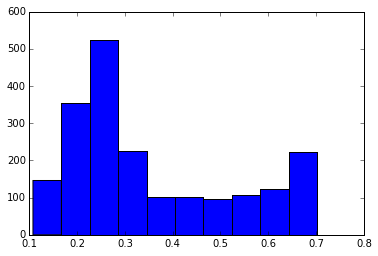

In [8]:
print "Average Error Rate:", np.average(error_rates_p18)
plt.hist(error_rates_p18)

## Problem 19

In [9]:
error_rates_p19 = []
w0 = np.zeros((5,))
for seed in range(2000):
    w=PLA(w0, 50, seed=seed)
    error_rates_p19.append(verify(w))

Average Error Rate: 0.362589


(array([ 151.,  348.,  491.,  218.,   93.,  106.,  126.,  106.,  132.,  229.]),
 array([ 0.108 ,  0.1674,  0.2268,  0.2862,  0.3456,  0.405 ,  0.4644,
         0.5238,  0.5832,  0.6426,  0.702 ]),
 <a list of 10 Patch objects>)

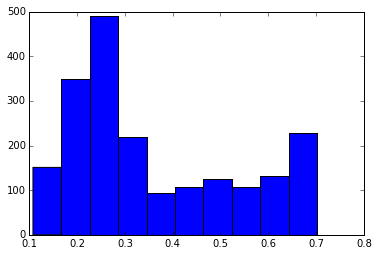

In [10]:
print "Average Error Rate:", np.average(error_rates_p19)
plt.hist(error_rates_p19)

## Problem 20

In [11]:
error_rates_p20 = []
w0 = np.zeros((5,))
for seed in range(2000):
    w=pocket(w0, 100, seed=seed)
    error_rates_p20.append(verify(w))

Average Error Rate: 0.322466


(array([ 285.,  336.,  450.,  264.,  129.,  118.,  102.,   90.,   74.,  152.]),
 array([ 0.1   ,  0.1602,  0.2204,  0.2806,  0.3408,  0.401 ,  0.4612,
         0.5214,  0.5816,  0.6418,  0.702 ]),
 <a list of 10 Patch objects>)

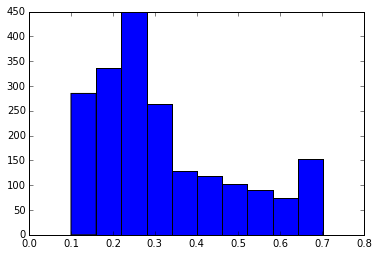

In [12]:
print "Average Error Rate:", np.average(error_rates_p20)
plt.hist(error_rates_p20)